# #1 Supervised learning in Python

**Oxford University Economics Summer School 2025, Foundations of Machine Learning**

*Johanna Barop, 2025*


This is a *Google Colab document*. Think of Google Colab as "Google Docs for Jupyter" ✨. It's basically a *Jupyter Notebook* (which allows you to combine markdown text cells and code cells) integrated into your *Google Drive*.

We will use Google Colab for all tutorials, so you can code directly in your browser without installing any software or Python packages, and make use of Colab's free GPUs.

You may want to consult Chapter 5 of the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas or to the `scikit-learn` [documentation](https://scikit-learn.org) to solve this exercise.

## Setup

You will need a few standard packages for numerical calculations and plotting for this exercise. Run the cell below to load them:

In [92]:
import numpy as np
import matplotlib.pyplot as plt

Next load functions from `skikit-learn`:

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Let's also set a *seed* so that our code is deterministic and we can compare results:

In [94]:
set_seed = 1234
np.random.seed(set_seed) # Note that random.seed() is *not* used by scikit-learn

## **Reminder:** The recipe for supervised learning

1. **Transform your input data**, to create a matrix of features `X` and a vector of outcomes `Y`.
2. **Select a model.** Models will typically have hyper-parameters that determine the degree of *regularisation* or model complexity, which trade off variance and bias. More complex models have less bias, but more variance and tend to overfit the data.
3. **Evaluate out-of sample performance** using *sample splitting* or *cross-validation* with `cross_val_score`.
4. **Choose hyper-parameters** by doing a *grid search* to minimise cross-validated prediction loss, using `GridSearchCV`.
5. Then **use the estimator with optimized hyperparameters for predictions** on new observations.

The problem set will follow this recipe. Make sure you understand all the steps - our work in the coming days will build on these concepts.

## **Question 1:** Load the `iris` data set.

The `iris` dataset consists of 50 samples from each of the three species of *iris*, collected by Edgar Anderson on the Gaspé Peninsula, Canada. For each of the 150 flowers, Anderson noted its sepal length, sepal width, petal length, petal width, and species. The British statistician and biologist Ronald Fisher popularised this dataset in his 1936 paper "The use of multiple measurements in taxonomic problems". It is one of the standard beginner's datasets for machine learning.

Let's have a look at the `iris` dataset.

Note that we can convert the standard `DataFrame` display to an interactive table to streamline data exploration.

In [95]:
# Load and display the iris data set.
import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.drop("species", axis=1)
y = iris["species"]

iris # Display the iris data set.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


If the features are measured in different units or had very different scales, standardising the data can enourmously improve accuracy. We'll skip this step in the interest of time and focus on the machine learning algorithms instead.

### Some botany for background

But what are *petals* and *sepals*?

In [96]:
# This is to display the image below from my drive. No need to run this block.
# from google.colab import drive
# drive.mount("/content/drive")

![iris-sepal-petal-species.jpg](https://drive.google.com/uc?export=view&id=1Eui-jEqum9leu8GAZTXN2bl5ieY3x8n3)
Figure taken from: https://rpubs.com/vidhividhi/irisdataeda

Context is key for data analysis.

## **Question 2:** Split the `iris` dataset into training and testing sets using `train_test_split`.

### Train-test-splits

Why do we do *train-test-splits*?

### Overfitting and underfitting

What are *overfitting* and *underfitting*?

In [97]:
# Perform a train test split.
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

Open up your **variable environment** using the lefthand-side menu and check if `Xtrain`, `Xtest`, `ytrain`, and `ytest` are there. What form do they take?

## **Question 3:** Train a `LogisticRegression` model on the training set.

### Remember *logistic regressions*?

They transform a linear combination of input features into a probability value ranging from 0 to 1. How could we use this for classification?

We will use a *multinomial logit model*. You should be familiar with this model from e.g. *Random Utility Models* in economics. A quick recap:

**Multinomial logit**

The probability of assigning species $i$ from a set of $i = 1, ..., J$ alternatives is
$$
P_{i} = \frac{\exp(V_i)}{\sum_j \exp(V_j)} , i\neq j
$$
where $V_i$ and $V_j$ are linear combinations of input features:

$V_{setosa} = \alpha_{setosa} + \beta_{setosa}$ `sepal_length`$ + \gamma_{setosa}$ `sepal_width`$ + \delta_{setosa}$ `petal_length`$ + \theta_{setosa}$ `petal_width`

Note that for $J$ alternatives, we can only identify $J-1$ intercepts because only the difference of $V_i + \epsilon_i$ to the base case matters for classification.

To estimate the parameter vector, we maximise the *log likelihood*, summing up over observations $n$ and alternatives $i$:
$$
\max \log L = \sum_{n=1}^N \sum_{i=1}^J d_{ni} \log P_{ni}
$$
where $d_{ni}$ = 1 if the $n$th iris observed corresponds to species $i$.

So far, so familiar. What's new?



### Regularisation

**L1 regularistion**
$$
\max \log L \color{red}{- \lambda \sum_{i=1}^J |\alpha_i| + |\beta_i| + |\gamma_i| + |\delta_i| + |\theta_i|}
$$

**L2 regularisation**
$$
\max \log L \color{red}{- \lambda \sum_{i=1}^J \alpha_i^2 + \beta_i^2 + \gamma_i^2 + \delta_i^2 + \theta_i^2}
$$

If we increase $\lambda$, we penalise model complexity. The principle is the same as with *Ride* and *Lasso Regression*, which you saw in your lecture today. The penalty term avoids blowing up coefficients to fit random patterns and implicitly selects variables. By default, `LogisticRegression()` uses *L2 regularisation* with $C = 1/\lambda = 1$. Smaller values imply stronger regularisation. L2 loss functions, unlike L1 loss functions, always have a stable unique solution.

As far as machine learning models go, that's fairly basic (but older deep neural nets use logistic functions as *activation functions* for neurons, so they're an important building block). From a simple model like this we'll usually get an OK accuracy (more elaborate classifiers would do much better), but the chance of overfitting is much smaller, and the model is easier to explain to non-experts. **If you use machine learning for your own research, you might sometimes have to trade off the explainability and performance of your models.**

In [98]:
# Select the LogisticRegression model class.

# Fit the model to the training data.
model = LogisticRegression()
model.fit(Xtrain, ytrain)

y_predicted_test = model.predict(Xtest)
accuracy_score(ytest, y_predicted_test)

0.9736842105263158

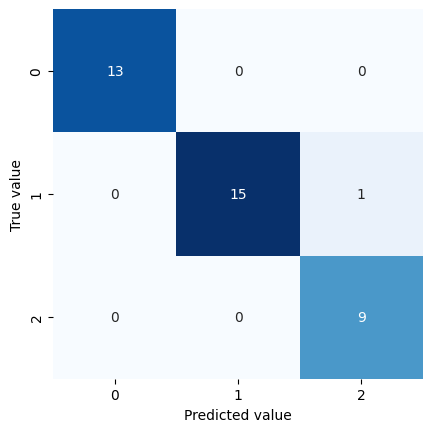

In [99]:
mat = confusion_matrix(ytest, y_predicted_test)
from seaborn import heatmap
heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('Predicted value')
plt.ylabel('True value');

## **Question 4:** Evaluate the model’s performance on the test set using `accuracy_score`.

In [100]:
# Predit outcomes for test data.

# Compute accuracy by comparing predicitions to true values of test data.


## **Question 5:** Perform 5-fold cross-validation on the `iris` dataset using `cross_val_score` with a `KNeighborsClassifier`, using 3 nearest neighbors.


### A quick primer on *$k$-nearest neighbours (k-NN)*

Intuitively, k-NN uses the $k$ examples most similar to the observation to assign it a class. The neighbours "majority-vote" on class membership. Functions are only approximated locally, which improves flexibility of the algorithm.

<img src="https://drive.google.com/uc?export=view&id=1d3xvzZSBlyuQid_e4-v1QEHVClekIV69" width="500"/>
</div>

Figure taken from: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#/media/File:KnnClassification.svg

There are different metrics for the similarity of observations. The most common one is the *Euclidian distance*:

$$
\sqrt{(\text{sepal_length}_n - \text{sepal_length}_m)^2 + ... + (\text{petal_width}_n - \text{petal_length}_m)^2}
$$

It is possible to weight the vote of each of the neighbours by their distance, such that a closer neighbour's class holds more weight for classification. If the class distribution is heavily skewed, it is possible to account for that in the weighting too.

The default setting of `KNeighborsClassifier()` uses $k=5$ neighbours, uniform weights, and the *Minkowski distance* (which is a generalisation of the Euclidian distance and in the standard settings with `p=2` defaults to it).


In [101]:
# Fit a k-NN classifier with 3 neighbours.

model_Kn = KNeighborsClassifier(n_neighbors=3)
model_Kn.fit(Xtrain, ytrain)

# what happen if voting is a tie ?

KNeighborsClassifier(n_neighbors=3)

What is cross validation and why do we do it?

In [102]:
# Perform 5-fold cross validation to evaluate test accuracy.

# why CV matters? And how it works?
# A: split the data set into smaller ones, to test the model
#  - and rotate the spliting
#  - and compare across all models/splits
#  - to see the differences and obtain the CV scores

cross_scores = cross_val_score(model_Kn, X, y, cv=5)
cross_scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

## **Question 6:** Use `GridSearchCV` to find the best hyperparameter (i.e. number of nearest neighbors) for this classifier, using only the training data.

We used $k=3$ neighbours previously. Is it possible to *tune* this parameter for better prediction accuracy?

In [103]:
# Compute the mean.
crosscore.mean()

# Define the paramter range for k. These are values we think are interesting to try out.
k_range = np.arange(1, 17)

# Perform a *grid search*. This fits a series of models and evaluates their accuracy for direct comparison.
grid = GridSearchCV(kNN_model, {'n_neighbors': k_range}, cv=5, scoring="accuracy")
grid.fit(Xtrain, ytrain)  # Fit the grid search on *only* the training data.
grid.best_params_         # Print the k with the best prediction accuracy.

SyntaxError: invalid syntax (ipython-input-1481296931.py, line 7)

What is the best $k$ for out-of sample prediction accuracy?

## **Question 7:** Compute and plot the *confusion matrix* for the optimal classifier that your found, using the test data.

In [ ]:
# Select the best k-NN model from the grid search.

# Compute the confusion matrix.

# Plot the consusion matrix as a heatmap (using the seaborn package).


# heatmap is useful to figure out the problem of variables/models that selected
"""Q3"""
# Select the best k-NN model from the grid search.
best_kNN_model = grid.best_estimator_
y_bestPredicted_test = best_kNN_model.predict(Xtest)

# Compute the confusion matrix.
mat = confusion_matrix(ytest, y_bestPredicted_test)

# Plot the consusion matrix as a heatmap (using the seaborn package).
iris_labels = ["setosa", "versicolor", "virginica"] # manually add labels
sns.heatmap(mat, square=True, annot=True, xticklabels=iris_labels, yticklabels=iris_labels)
plt.xlabel("predicted")
plt.ylabel("true")